In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 10000  # Number of rows

# Gender and Product Preference categories
gender_categories = ['Male', 'Female']
product_categories = ['Product A', 'Product B', 'Product C']

# Generate random data
gender_data = np.random.choice(gender_categories, n)
product_data = np.random.choice(product_categories, n)

In [5]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Product': product_data
})

# Show the first few rows of the dataset
print(data.head())

   Gender    Product
0    Male  Product C
1  Female  Product C
2    Male  Product C
3    Male  Product B
4    Male  Product C


In [6]:
contingency_table = pd.crosstab(data['Gender'], data['Product'])
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
Product  Product A  Product B  Product C
Gender                                  
Female        1673       1692       1622
Male          1681       1663       1669


In [7]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-Square Test Results:
Chi2: 0.873382790210498, p-value: 0.6461708121195762


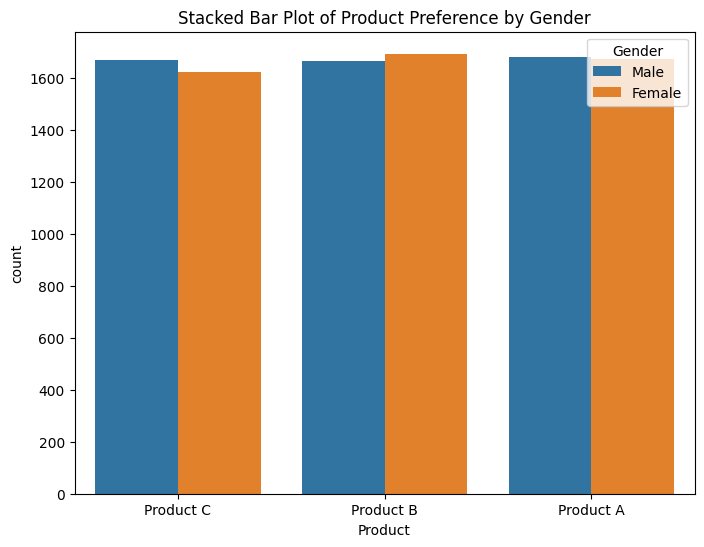

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Product', hue='Gender')
plt.title("Stacked Bar Plot of Product Preference by Gender")
plt.show()

In [9]:
def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k - 1, r - 1)))

# Number of categories in each variable
k = len(data['Gender'].unique())  # Number of categories in 'Gender'
r = len(data['Product'].unique())  # Number of categories in 'Product'

# Cramér's V
cramers_v_value = cramers_v(chi2, n, k, r)
print(f"\nCramér's V: {cramers_v_value}")


Cramér's V: 0.009345495119096141


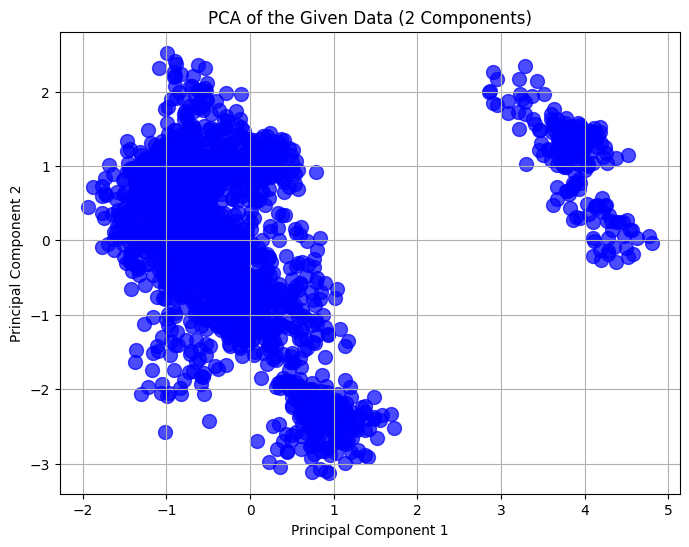


Explained Variance Ratio by each component:
PC1: 0.2759, PC2: 0.1848

PCA Components (Principal Axes in Feature Space):
[[-0.30219096  0.64378667  0.62260719 -0.21242839 -0.06848339 -0.22694272
  -0.07253163]
 [ 0.33410693  0.03435809  0.2838292   0.35948683  0.73791663 -0.22065738
   0.290158  ]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Create the DataFrame from the provided data

df = pd.read_csv('Crop_recommendation.csv')

# Step 2: Standardize the data (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the PCA result (scatter plot of the first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='b', s=100, alpha=0.7)
plt.title('PCA of the Given Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 5: Explained Variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio by each component:")
print(f"PC1: {explained_variance[0]:.4f}, PC2: {explained_variance[1]:.4f}")

# Optional: Check the components (i.e., eigenvectors)
print("\nPCA Components (Principal Axes in Feature Space):")
print(pca.components_)
